# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [25]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [26]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [27]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects'

# Section 1

Section 1 content

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

file_path = r"C:\Users\Seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data/ufc-fighters-statistics.csv"
df = pd.read_csv(file_path)

df.head()

# loading in the dataset, and looking through the first 5 rows


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [29]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# checking for any missing values which there are, but in unimportant categories

Missing Values per Column:
 name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [30]:
df.drop(columns=["nickname", "date_of_birth"], inplace=True)  # Drop unnecessary columns
df["stance"] = df["stance"].fillna("Orthodox") # Fill missing stances with the most common one


In [31]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))
# Filling missing values with the average height per weight class.

df["weight_in_kg"] = df["weight_in_kg"].fillna(df["weight_in_kg"].median())
# If most missing values are for fighters with missing height, estimate using their weight class average.

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))
# Fill missing values using average reach per height group.

In [32]:
cols_to_fill = [
    "significant_striking_accuracy",
    "significant_strike_defence",
    "average_takedowns_landed_per_15_minutes",
    "takedown_accuracy",
    "takedown_defense",
    "average_submissions_attempted_per_15_minutes"
]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())  # Reassign the column




In [33]:
print(df.isnull().sum())  # Should show 0 or very few missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                        92
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [34]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))


In [35]:
print(df.isnull().sum())  # checking for missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                         5
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [36]:
df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))

df["height_cm"] = df["height_cm"].fillna(df["height_cm"].median())


In [37]:
print(df.isnull().sum())  # checking for missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                         0
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [38]:
df["reach_in_cm"] = df["reach_in_cm"].fillna(df["reach_in_cm"].median())

print(df.isnull().sum())  # Should print all zeros!


name                                            0
wins                                            0
losses                                          0
draws                                           0
height_cm                                       0
weight_in_kg                                    0
reach_in_cm                                     0
stance                                          0
significant_strikes_landed_per_minute           0
significant_striking_accuracy                   0
significant_strikes_absorbed_per_minute         0
significant_strike_defence                      0
average_takedowns_landed_per_15_minutes         0
takedown_accuracy                               0
takedown_defense                                0
average_submissions_attempted_per_15_minutes    0
dtype: int64


In [39]:
# Convert date column if applicable
if "date_of_birth" in df.columns:
    df["age"] = 2024 - pd.to_datetime(df["date_of_birth"], errors="coerce").dt.year

# Calculate Reach-to-Height Ratio
df["reach_to_height"] = df["reach_in_cm"] / df["height_cm"]

---

# Section 2

Section 2 content

c:\Users\seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


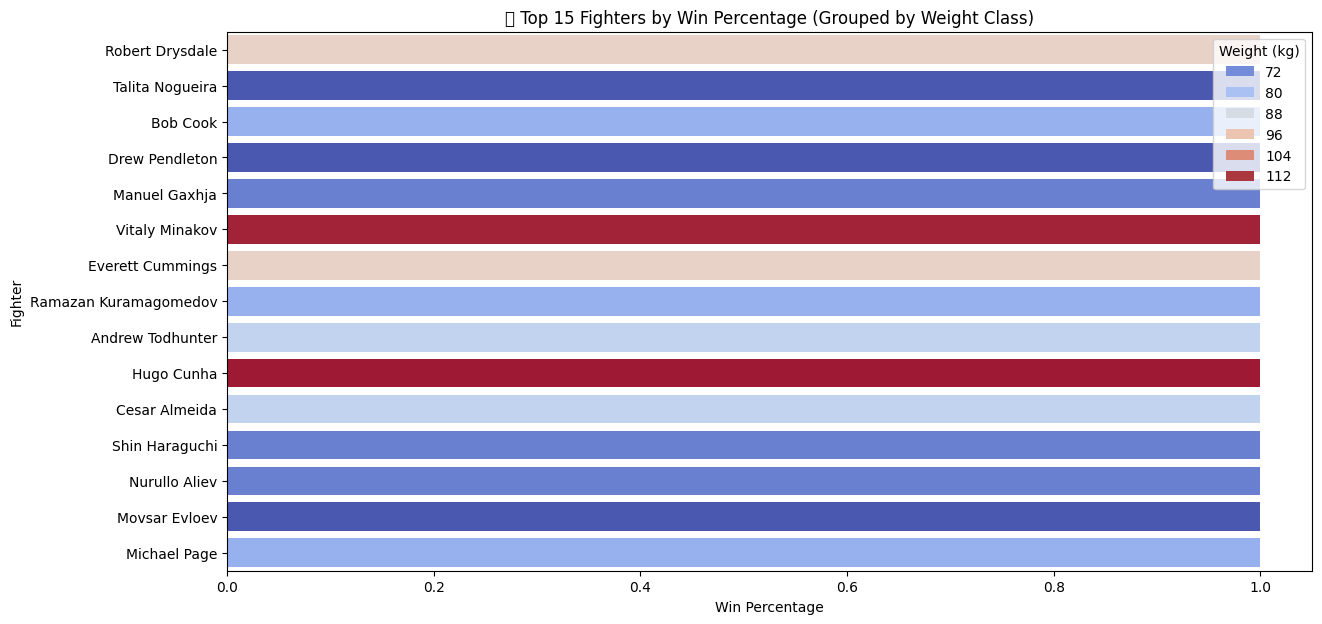

In [40]:
# Sort by win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"] + df["draws"])
top_fighters = df.sort_values("win_percentage", ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x="win_percentage", y="name", hue="weight_in_kg", data=top_fighters, palette="coolwarm", dodge=False)
plt.xlabel("Win Percentage")
plt.ylabel("Fighter")
plt.title("🥇 Top 15 Fighters by Win Percentage (Grouped by Weight Class)")
plt.legend(title="Weight (kg)")
plt.show()

c:\Users\seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


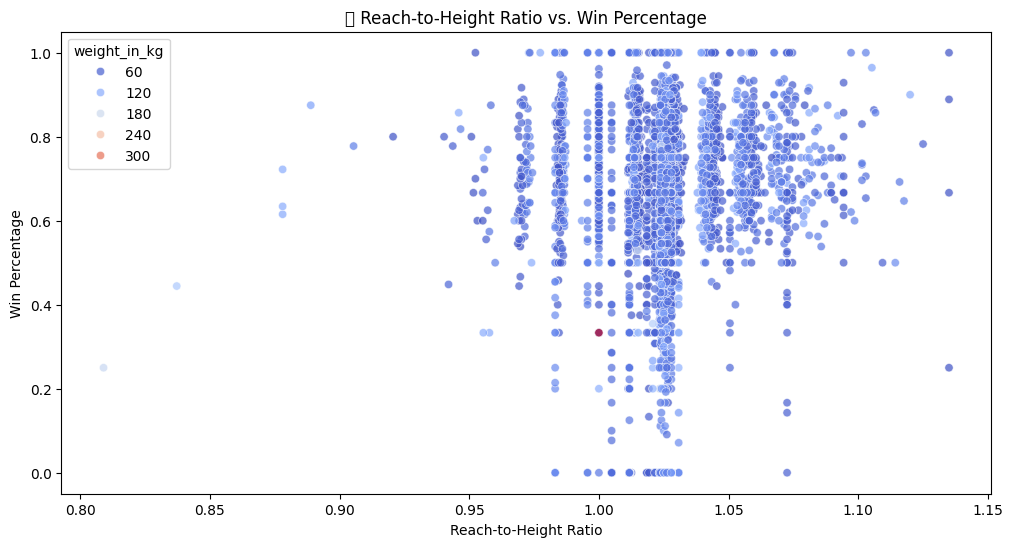

In [41]:
# Calculate reach-to-height ratio
df["reach_height_ratio"] = df["reach_in_cm"] / df["height_cm"]

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["reach_height_ratio"], y=df["win_percentage"], hue=df["weight_in_kg"], alpha=0.7, palette="coolwarm")
plt.xlabel("Reach-to-Height Ratio")
plt.ylabel("Win Percentage")
plt.title("📏 Reach-to-Height Ratio vs. Win Percentage")
plt.show()

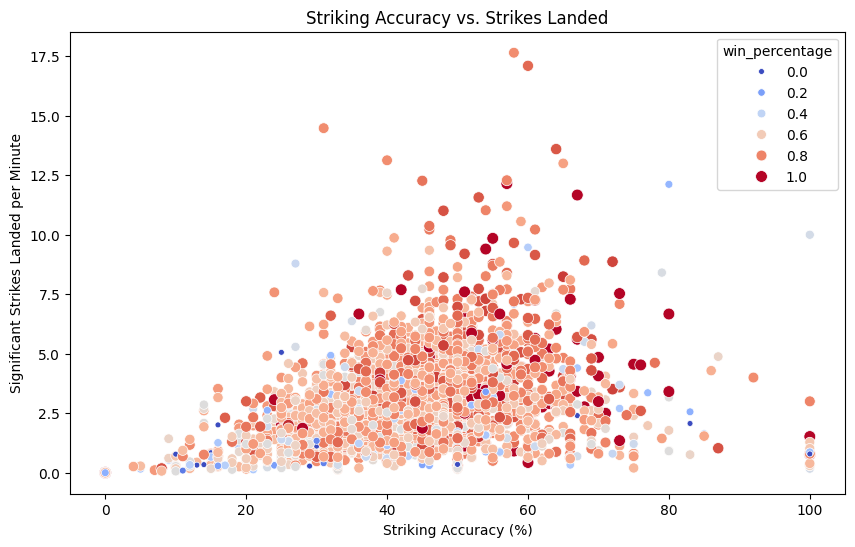

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="significant_striking_accuracy", y="significant_strikes_landed_per_minute",
                hue="win_percentage", size="win_percentage", palette="coolwarm", data=df)
plt.xlabel("Striking Accuracy (%)")
plt.ylabel("Significant Strikes Landed per Minute")
plt.title("Striking Accuracy vs. Strikes Landed")
plt.show()


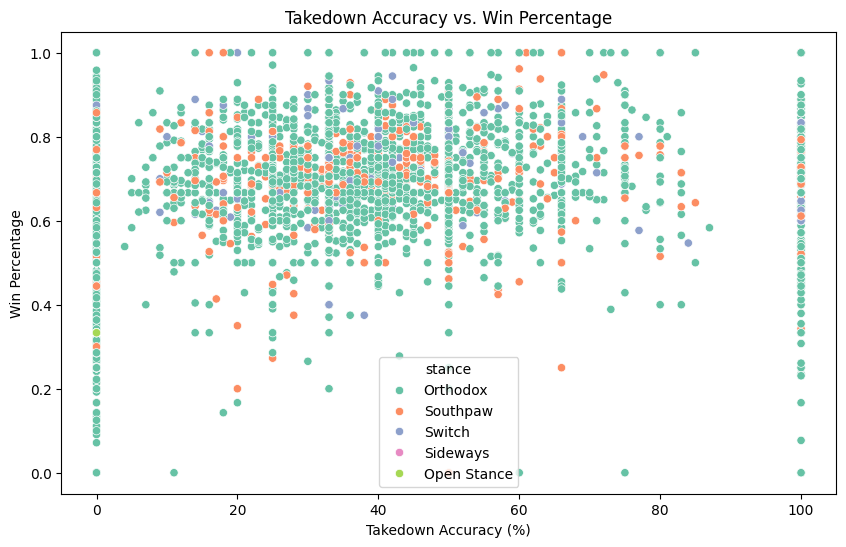

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="takedown_accuracy", y="win_percentage", hue="stance", data=df, palette="Set2")
plt.xlabel("Takedown Accuracy (%)")
plt.ylabel("Win Percentage")
plt.title("Takedown Accuracy vs. Win Percentage")
plt.show()


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [44]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)